# 🔍 Two Submission Files Detailed Comparison

**목적**: 두 개의 submission CSV 파일을 선택하여 상세하게 비교 분석합니다.

## 📋 분석 내용
1. **파일 선택**: 비교할 두 CSV 파일 지정
2. **전체 데이터 비교**: 기본 통계 및 분포 비교
3. **차이점 추출**: 예측이 다른 행들만 따로 추출
4. **상세 분석**: 차이나는 샘플들의 패턴 분석
5. **시각화**: 다양한 차트로 비교 결과 시각화
6. **결과 내보내기**: 차이점 데이터를 CSV로 저장

In [1]:
# [1] 프로젝트 루트 디렉토리로 이동
# 노트북이 modular/results_comparison 폴더에 있으므로 3단계 상위로 이동
import os
import sys
from pathlib import Path

# 현재 작업 디렉토리를 프로젝트 루트로 변경 (submissions, src 폴더 접근을 위해)
os.chdir("../../../")
print("현재 작업 디렉토리:", os.getcwd())

# NotebookLogger 관련 함수 import
from src.logging.notebook_logger import create_notebook_logger

현재 작업 디렉토리: /home/ieyeppo/AI_Lab/computer-vision-competition-1SEN


In [2]:
# [2] 폰트 설정 및 경고 억제
# 경고 억제 설정
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 적용 및 시각화 환경 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 및 설정
font_path = './font/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 폰트 등록 및 설정 (한글 텍스트 표시를 위함)
fe = fm.FontEntry(fname=font_path, name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams['font.family'] = 'NanumGothic'      # 기본 폰트를 나눔고딕으로 설정
plt.rcParams['font.size'] = 10                   # 기본 글자 크기 설정
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 기호 깨짐 방지

# 글자 겹침 방지를 위한 레이아웃 설정
plt.rcParams['figure.autolayout'] = True         # 자동 레이아웃 조정
plt.rcParams['axes.titlepad'] = 20               # 제목과 축 사이 여백

# 폰트 로드 확인
try:
    test_font = fm.FontProperties(fname=font_path)
    print("✅ 나눔고딕 폰트 로드 성공")
except Exception as e:
    print(f"❌ 폰트 로드 실패: {e}")

✅ 나눔고딕 폰트 로드 성공


In [3]:
# [3] 필수 라이브러리 임포트
# 데이터 분석을 위한 핵심 라이브러리들 로드
import pandas as pd              # CSV 파일 로드 및 데이터프레임 조작
import numpy as np               # 수치 계산 및 배열 처리
import matplotlib.pyplot as plt  # 기본 그래프 생성
import seaborn as sns           # 통계적 시각화
import plotly.express as px     # 인터랙티브 차트 생성
import plotly.graph_objects as go  # 커스텀 plotly 차트
from plotly.subplots import make_subplots  # 서브플롯 생성
from pathlib import Path        # 파일 경로 처리
from datetime import datetime   # 날짜/시간 처리
import ipywidgets as widgets    # 노트북 위젯 (향후 인터랙티브 기능용)
from IPython.display import display, HTML  # 결과 표시

# 시각화 스타일 설정
sns.set_style("whitegrid")      # seaborn 격자 스타일 적용
plt.style.use('seaborn-v0_8')   # matplotlib seaborn 스타일 적용

print("✅ 라이브러리 로드 완료!")

✅ 라이브러리 로드 완료!


In [4]:
# [1] 📁 비교할 두 CSV 파일 경로 설정
# ⚠️ 사용자 설정: 비교하고 싶은 두 CSV 파일의 절대 경로를 입력하세요

# 첫 번째 파일 경로 (예: Swin 모델 결과)
FILE_1_PATH = "./submissions/20250908/20250908_0521_swin_base_384_ensemble_tta_basic_augmentation.csv"

# 두 번째 파일 경로 (예: EfficientNet 모델 결과)  
FILE_2_PATH = "./submissions/20250910/20250910_0708_multi-model-ensemble-inference_ensemble_essential_tta.csv"

# 비교 분석 이름 (결과 폴더명에 사용)
COMPARISON_NAME = "swin_vs_multi-model-ensemble-rtx4090"

print("🎯 비교 설정 완료!")
print("=" * 60)
print(f"📄 File 1: {FILE_1_PATH}")
print(f"📄 File 2: {FILE_2_PATH}")
print(f"📁 결과 저장명: {COMPARISON_NAME}")

🎯 비교 설정 완료!
📄 File 1: ./submissions/20250908/20250908_0521_swin_base_384_ensemble_tta_basic_augmentation.csv
📄 File 2: ./submissions/20250910/20250910_0708_multi-model-ensemble-inference_ensemble_essential_tta.csv
📁 결과 저장명: swin_vs_multi-model-ensemble-rtx4090


In [5]:
# [4] 📊 파일 로드 및 기본 정보 확인
def load_and_validate_files(file1_path, file2_path):
    """
    지정된 경로의 두 CSV 파일을 로드하고 기본 정보를 확인
    
    Args:
        file1_path (str): 첫 번째 파일 경로
        file2_path (str): 두 번째 파일 경로
        
    Returns:
        tuple: (df1, df2, file1_info, file2_info) 또는 (None, None, None, None)
    """
    try:
        # 파일 경로를 Path 객체로 변환
        path1 = Path(file1_path)
        path2 = Path(file2_path)
        
        # 파일 존재 여부 확인
        if not path1.exists():
            print(f"❌ 파일을 찾을 수 없습니다: {file1_path}")
            return None, None, None, None
            
        if not path2.exists():
            print(f"❌ 파일을 찾을 수 없습니다: {file2_path}")
            return None, None, None, None
        
        print("📊 CSV 파일 로드 중...")
        print("=" * 60)
        
        # CSV 파일을 pandas DataFrame으로 로드
        df1 = pd.read_csv(path1)
        df2 = pd.read_csv(path2)
        
        # 파일 정보 생성
        file1_info = {
            'filename': path1.name,
            'path': str(path1),
            'size_mb': path1.stat().st_size / (1024*1024)
        }
        
        file2_info = {
            'filename': path2.name,
            'path': str(path2),
            'size_mb': path2.stat().st_size / (1024*1024)
        }
        
        # 첫 번째 파일의 기본 정보 출력
        print(f"📄 {file1_info['filename']}:")
        print(f"   📏 Shape: {df1.shape}")                           # 행, 열 개수
        print(f"   📋 Columns: {list(df1.columns)}")                 # 컬럼명 리스트
        print(f"   🎯 Unique targets: {df1['target'].nunique()}")    # 고유한 클래스 개수
        print(f"   📈 Target range: {df1['target'].min()} ~ {df1['target'].max()}")  # 클래스 범위
        print(f"   💾 File size: {file1_info['size_mb']:.2f}MB")
        
        # 두 번째 파일의 기본 정보 출력
        print(f"\\n📄 {file2_info['filename']}:")
        print(f"   📏 Shape: {df2.shape}")                           # 행, 열 개수
        print(f"   📋 Columns: {list(df2.columns)}")                 # 컬럼명 리스트
        print(f"   🎯 Unique targets: {df2['target'].nunique()}")    # 고유한 클래스 개수
        print(f"   📈 Target range: {df2['target'].min()} ~ {df2['target'].max()}")  # 클래스 범위
        print(f"   💾 File size: {file2_info['size_mb']:.2f}MB")
        
        # 데이터 일관성 확인 (두 파일이 비교 가능한지 검사)
        print(f"\\n🔍 데이터 일관성 체크:")
        print(f"   ✅ 샘플 수 일치: {len(df1) == len(df2)}")
        
        if 'ID' in df1.columns and 'ID' in df2.columns:
            id_match = df1['ID'].equals(df2['ID'])
            print(f"   ✅ ID 순서 일치: {id_match}")
            if not id_match:
                print("   ⚠️  ID 순서가 다릅니다. 병합을 통해 비교합니다.")
        
        return df1, df2, file1_info, file2_info
        
    except Exception as e:
        print(f"❌ 파일 로드 중 오류 발생: {str(e)}")
        return None, None, None, None

# 파일 로드 실행
df1, df2, file1_info, file2_info = load_and_validate_files(FILE_1_PATH, FILE_2_PATH)

📊 CSV 파일 로드 중...
📄 20250908_0521_swin_base_384_ensemble_tta_basic_augmentation.csv:
   📏 Shape: (3140, 2)
   📋 Columns: ['ID', 'target']
   🎯 Unique targets: 17
   📈 Target range: 0 ~ 16
   💾 File size: 0.07MB
\n📄 20250910_0708_multi-model-ensemble-inference_ensemble_essential_tta.csv:
   📏 Shape: (3140, 2)
   📋 Columns: ['ID', 'target']
   🎯 Unique targets: 17
   📈 Target range: 0 ~ 16
   💾 File size: 0.07MB
\n🔍 데이터 일관성 체크:
   ✅ 샘플 수 일치: True
   ✅ ID 순서 일치: True


In [6]:
# [5] 📁 results_comparison 폴더에 저장하는 로거 시스템
# create_notebook_logger를 사용하여 results_comparison 폴더에 저장

def setup_comparison_logger(comparison_name):
    """
    results_comparison 폴더에 저장하는 로거 설정 함수
    
    Args:
        comparison_name (str): 비교 분석 이름
        
    Returns:
        NotebookLogger: 설정된 로거 인스턴스
    """
    # create_notebook_logger를 사용하여 results_comparison 폴더에 저장
    logger = create_notebook_logger(
        base_log_dir="modular",             # notebooks 폴더 내 기본 저장 경로
        folder_name="results_comparison",   # results_comparison 폴더 지정
        file_name=comparison_name           # 파일명으로 폴더 생성됨
    )
    
    print("📁 비교 분석 로거 설정 완료!")
    print("=" * 60)
    print(f"🎯 분석 이름: {comparison_name}")
    print(f"📂 기본 디렉터리: {logger.base_dir}")
    print(f"📝 로그 디렉터리: {logger.log_dir}")
    print(f"🖼️ 이미지 디렉터리: {logger.image_dir}")
    print(f"💾 데이터 디렉터리: {logger.data_dir}")
    print(f"📊 결과 디렉터리: {logger.results_dir}")
    
    # 비교 분석 시작 로그
    logger.log_info("두 파일 상세 비교 분석 시작")
    logger.log_info(f"비교 대상 1: {FILE_1_PATH}")
    logger.log_info(f"비교 대상 2: {FILE_2_PATH}")
    
    return logger

# 비교 분석용 로거 생성
comparison_logger = setup_comparison_logger(COMPARISON_NAME)

# 기존 output_folders 변수를 로거의 디렉터리 구조로 매핑
# (기존 코드와의 호환성을 위해 output_folders 딕셔너리 유지)
output_folders = {
    'base': comparison_logger.base_dir,
    'images': comparison_logger.image_dir,
    'logs': comparison_logger.log_dir,
    'results': comparison_logger.results_dir,
    'data': comparison_logger.data_dir  # 추가: 데이터 저장용 폴더
}

print("\n✅ results_comparison 폴더 기반 저장 시스템 활용 완료!")
print("📋 저장 위치:")
print(f"   📂 기본 폴더: notebooks/modular/results_comparison/")
print(f"   📁 결과 폴더: {COMPARISON_NAME}/{{timestamp}}/")
print("📋 장점:")
print("   - 체계적인 타임스탬프 기반 폴더 관리")
print("   - 자동 메타데이터 생성 및 저장")
print("   - 통합 로깅 시스템 (파일 + 콘솔)")
print("   - 다양한 파일 형식 지원 (CSV, Excel, JSON, PNG)")
print("   - 결과 요약 및 성능 메트릭 추적")

📝 노트북 작업 시작: swin_vs_multi-model-ensemble-rtx4090
📝 로그 디렉토리: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454
📁 비교 분석 로거 설정 완료!
🎯 분석 이름: swin_vs_multi-model-ensemble-rtx4090
📂 기본 디렉터리: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454
📝 로그 디렉터리: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/logs
🖼️ 이미지 디렉터리: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/images
💾 데이터 디렉터리: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/data
📊 결과 디렉터리: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/results
📝 두 파일 상세 비교 분석 시작
📝 비교 대상 1: ./submissions/20250908/20250908_0521_swin_base_384_ensemble_tta_basic_augmentation.csv
📝 비교 대상 2: ./submissions/20250910/20250910_0708_multi-model-ensemble-inference_ensemble_essential_tta.csv

✅ results_comparison 폴더 기반 저

In [7]:
# [6] 🔄 두 데이터프레임 병합 및 차이점 추출
if df1 is not None and df2 is not None:
    # ID 컬럼을 기준으로 두 DataFrame을 병합 (inner join)
    # suffixes로 같은 컬럼명(target)을 구분하여 _file1, _file2로 구분
    merged_df = pd.merge(df1, df2, on='ID', suffixes=('_file1', '_file2'))
    
    # 예측이 다른 행들과 같은 행들을 각각 추출
    different_predictions = merged_df[merged_df['target_file1'] != merged_df['target_file2']].copy()
    same_predictions = merged_df[merged_df['target_file1'] == merged_df['target_file2']].copy()
    
    print("🔄 병합 및 차이점 분석 완료!")
    print("=" * 60)
    print(f"📊 전체 샘플 수: {len(merged_df):,}")
    print(f"✅ 동일한 예측: {len(same_predictions):,}개 ({len(same_predictions)/len(merged_df)*100:.1f}%)")
    print(f"❌ 다른 예측: {len(different_predictions):,}개 ({len(different_predictions)/len(merged_df)*100:.1f}%)")
    
    # 차이점이 있는 경우 샘플 미리보기 출력
    if len(different_predictions) > 0:
        print(f"\\n🔍 차이점 샘플 미리보기 (처음 10개):")
        # 컬럼명을 파일명으로 변경하여 가독성 향상
        preview_df = different_predictions[['ID', 'target_file1', 'target_file2']].head(10)
        preview_df.columns = ['ID', f'{file1_info["filename"][:20]}...', f'{file2_info["filename"][:20]}...']
        print(preview_df.to_string(index=False))
    else:
        print("\\n🎉 두 파일의 모든 예측이 완전히 일치합니다!")
else:
    print("❌ 데이터가 로드되지 않았습니다.")

🔄 병합 및 차이점 분석 완료!
📊 전체 샘플 수: 3,140
✅ 동일한 예측: 2,969개 (94.6%)
❌ 다른 예측: 171개 (5.4%)
\n🔍 차이점 샘플 미리보기 (처음 10개):
                  ID  20250908_0521_swin_b...  20250910_0708_multi-...
00e15da96484eb94.jpg                        4                        3
03a7dcbe6b74bb8e.jpg                        3                       14
04fc58802ef2f7a6.jpg                        3                        7
0546cab14c4ee65b.jpg                        7                        3
075ed6e4c487debc.jpg                        3                        7
106e817be539b3e7.jpg                        4                        3
10f7a181195be840.jpg                        4                       14
12c0ac56836761e0.jpg                        3                        7
1421fb31607c5123.jpg                        6                       13
15a24e3d9d781c17.jpg                        3                        7


🎨 전체 비교 차트 생성 중...


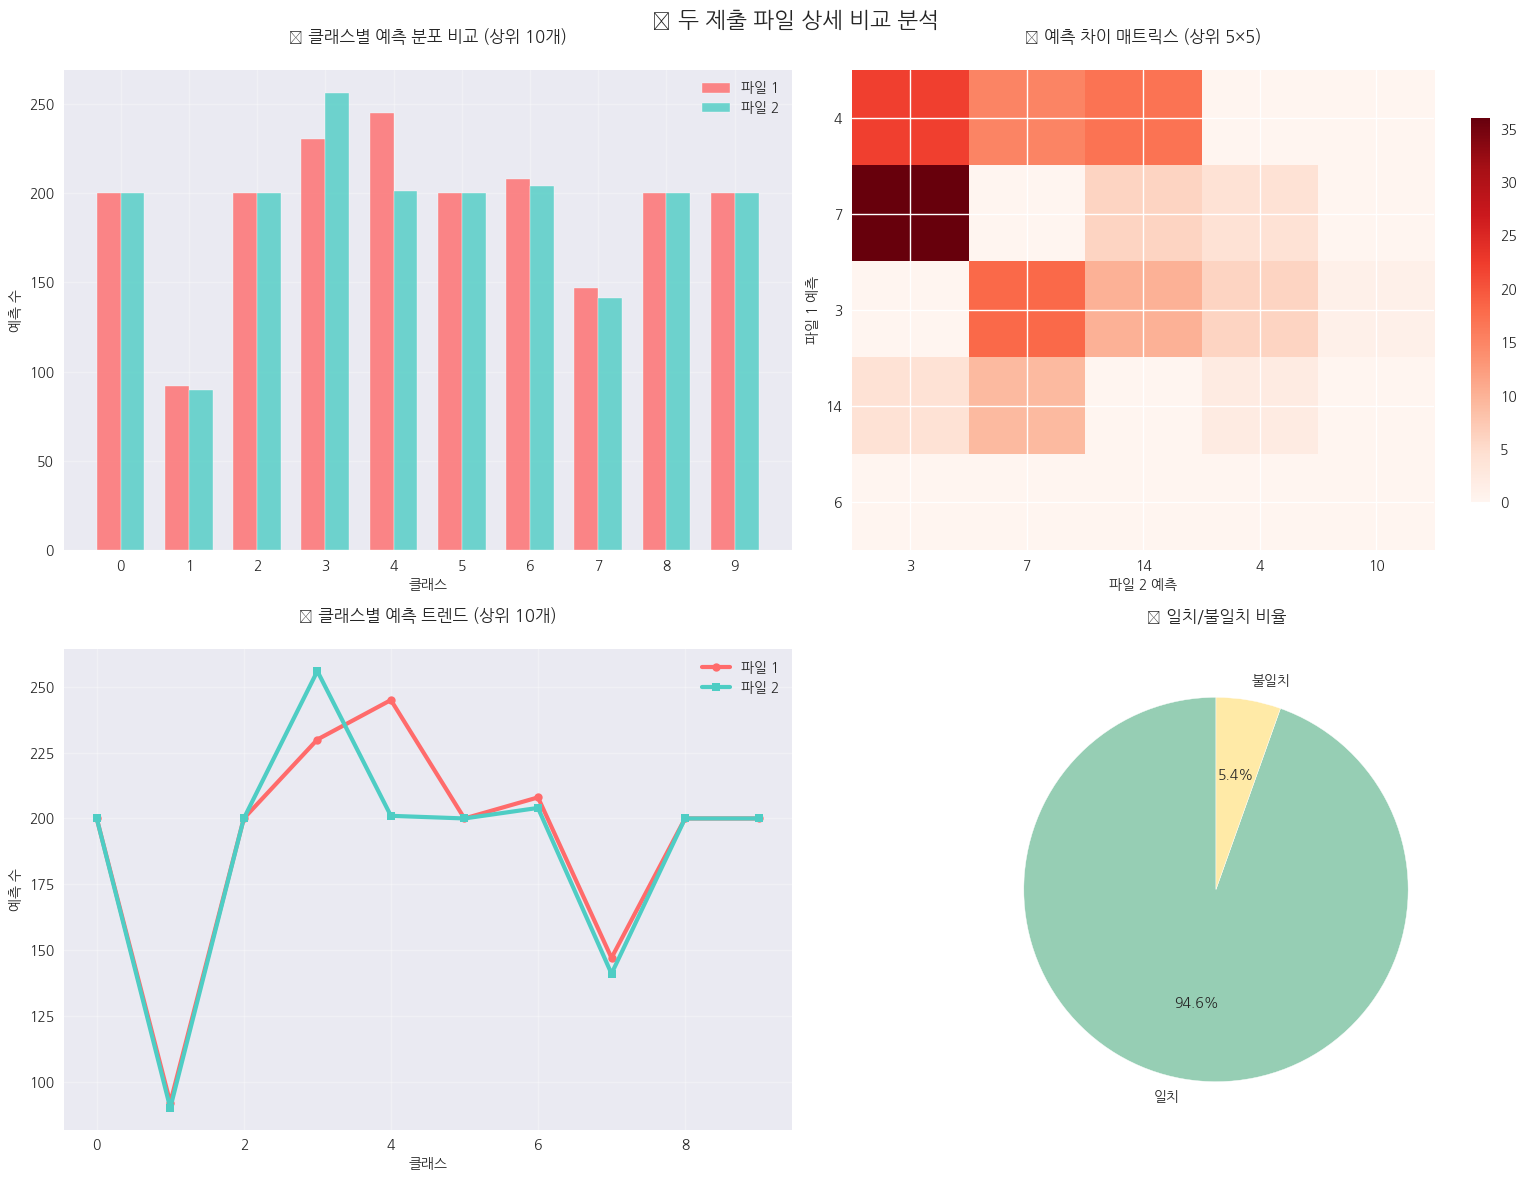

✅ 그림 저장: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/images/overall_comparison.png
💾 차트가 성공적으로 저장되었습니다!
✅ 전체 비교 차트 생성 완료!


In [8]:
# [7] 📈 전체 데이터 분포 비교 시각화 (Chrome 의존성 제거)
def plot_overall_comparison():
    """
    두 파일의 전체적인 비교를 위한 4개 차트를 생성하는 함수
    Chrome 의존성 없는 matplotlib 기반으로 최적화
    
    Returns:
        matplotlib.figure.Figure: 2x2 서브플롯 차트
    """
    if df1 is None or df2 is None:
        return None
    
    # 한글 폰트 설정 재적용 (함수 내에서 명시적으로)
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    
    font_path = './font/NanumGothic.ttf'
    if os.path.exists(font_path):
        fontprop = fm.FontProperties(fname=font_path)
        plt.rcParams['font.family'] = 'NanumGothic'
        plt.rcParams['font.size'] = 10
        plt.rcParams['axes.unicode_minus'] = False
    
    # matplotlib 기반 2x2 서브플롯 생성
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. 클래스별 분포 비교 (막대 차트)
    class_counts1 = df1['target'].value_counts().sort_index()
    class_counts2 = df2['target'].value_counts().sort_index()
    
    # 모든 클래스 합집합
    all_classes = sorted(set(class_counts1.index) | set(class_counts2.index))
    counts1 = [class_counts1.get(cls, 0) for cls in all_classes]
    counts2 = [class_counts2.get(cls, 0) for cls in all_classes]
    
    # 막대 차트 (상위 10개 클래스만 표시 - 성능 최적화)
    display_classes = all_classes[:10] if len(all_classes) > 10 else all_classes
    display_counts1 = counts1[:10] if len(counts1) > 10 else counts1
    display_counts2 = counts2[:10] if len(counts2) > 10 else counts2
    
    x = range(len(display_classes))
    width = 0.35
    
    ax1.bar([i - width/2 for i in x], display_counts1, width, label='파일 1', color='#FF6B6B', alpha=0.8)
    ax1.bar([i + width/2 for i in x], display_counts2, width, label='파일 2', color='#4ECDC4', alpha=0.8)
    ax1.set_title('📊 클래스별 예측 분포 비교 (상위 10개)', fontweight='bold', fontsize=12)
    ax1.set_xlabel('클래스', fontsize=10)
    ax1.set_ylabel('예측 수', fontsize=10)
    ax1.set_xticks(x)
    ax1.set_xticklabels(display_classes)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. 예측 차이 매트릭스 (히트맵) - 차이가 있는 경우만
    if len(different_predictions) > 0:
        confusion_matrix = pd.crosstab(
            different_predictions['target_file1'],
            different_predictions['target_file2']
        )
        
        # 상위 5x5 매트릭스만 표시 (성능 최적화)
        if confusion_matrix.shape[0] > 5 or confusion_matrix.shape[1] > 5:
            top_rows = confusion_matrix.sum(axis=1).nlargest(5).index
            top_cols = confusion_matrix.sum(axis=0).nlargest(5).index
            confusion_matrix = confusion_matrix.loc[top_rows, top_cols]
        
        im = ax2.imshow(confusion_matrix.values, cmap='Reds', aspect='auto')
        ax2.set_title('🔄 예측 차이 매트릭스 (상위 5×5)', fontweight='bold', fontsize=12)
        ax2.set_xlabel('파일 2 예측', fontsize=10)
        ax2.set_ylabel('파일 1 예측', fontsize=10)
        ax2.set_xticks(range(len(confusion_matrix.columns)))
        ax2.set_yticks(range(len(confusion_matrix.index)))
        ax2.set_xticklabels(confusion_matrix.columns)
        ax2.set_yticklabels(confusion_matrix.index)
        
        # 컬러바 추가
        plt.colorbar(im, ax=ax2, shrink=0.8)
    else:
        ax2.text(0.5, 0.5, '차이점 없음', ha='center', va='center', fontsize=16, transform=ax2.transAxes)
        ax2.set_title('🔄 예측 차이 매트릭스', fontweight='bold', fontsize=12)
    
    # 3. 클래스별 트렌드 (라인 차트)
    ax3.plot(display_classes, display_counts1, 'o-', color='#FF6B6B', linewidth=3, markersize=6, label='파일 1')
    ax3.plot(display_classes, display_counts2, 's-', color='#4ECDC4', linewidth=3, markersize=6, label='파일 2')
    ax3.set_title('📈 클래스별 예측 트렌드 (상위 10개)', fontweight='bold', fontsize=12)
    ax3.set_xlabel('클래스', fontsize=10)
    ax3.set_ylabel('예측 수', fontsize=10)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. 일치/불일치 파이 차트
    sizes = [len(same_predictions), len(different_predictions)]
    labels = ['일치', '불일치']
    colors = ['#96CEB4', '#FFEAA7']
    
    wedges, texts, autotexts = ax4.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                       colors=colors, startangle=90)
    ax4.set_title('🎯 일치/불일치 비율', fontweight='bold', fontsize=12)
    
    # 전체 제목
    fig.suptitle('🔍 두 제출 파일 상세 비교 분석', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    
    return fig

# 전체 비교 차트 생성 및 표시
if df1 is not None and df2 is not None:
    print("🎨 전체 비교 차트 생성 중...")
    
    try:
        overall_fig = plot_overall_comparison()
        if overall_fig:
            plt.show()
            
            # NotebookLogger를 활용한 안전한 이미지 저장
            if 'comparison_logger' in globals():
                comparison_logger.save_figure(
                    overall_fig, 
                    "overall_comparison.png",
                    "두 파일 전체 비교 시각화 - 클래스 분포, 차이 매트릭스, 트렌드, 일치율"
                )
                print("💾 차트가 성공적으로 저장되었습니다!")
            else:
                print("⚠️ 로거가 설정되지 않아 이미지 저장을 건너뜁니다.")
            
            plt.close(overall_fig)  # 메모리 해제
            print("✅ 전체 비교 차트 생성 완료!")
        else:
            print("❌ 차트 생성에 실패했습니다.")
            
    except Exception as e:
        print(f"❌ 차트 생성 중 오류 발생: {str(e)}")
        print("   데이터 상태를 확인해주세요.")
        
else:
    print("❌ 데이터가 준비되지 않았습니다. 이전 셀들을 먼저 실행해주세요.")

In [9]:
# 🔍 차이점 상세 분석
if file1_info and file2_info and len(different_predictions) > 0:
    print("🔍 예측 차이 상세 분석")
    print("=" * 60)
    
    # 1. 가장 많이 다른 클래스 쌍 찾기
    diff_patterns = different_predictions.groupby(['target_file1', 'target_file2']).size().reset_index(name='count')
    diff_patterns = diff_patterns.sort_values('count', ascending=False)
    
    print("📊 가장 빈번한 예측 차이 패턴 (Top 10):")
    print("-" * 50)
    top_patterns = diff_patterns.head(10)
    for _, row in top_patterns.iterrows():
        percentage = (row['count'] / len(different_predictions)) * 100
        print(f"   {row['target_file1']} → {row['target_file2']}: {row['count']}개 ({percentage:.1f}%)")
    
    # 2. 파일별 차이가 많은 클래스
    file1_diff_classes = different_predictions['target_file1'].value_counts()
    file2_diff_classes = different_predictions['target_file2'].value_counts()
    
    print(f"\n📈 File 1에서 차이가 많은 클래스 (Top 5):")
    for cls, count in file1_diff_classes.head(5).items():
        percentage = (count / len(different_predictions)) * 100
        print(f"   클래스 {cls}: {count}개 ({percentage:.1f}%)")
    
    print(f"\n📉 File 2에서 차이가 많은 클래스 (Top 5):")
    for cls, count in file2_diff_classes.head(5).items():
        percentage = (count / len(different_predictions)) * 100
        print(f"   클래스 {cls}: {count}개 ({percentage:.1f}%)")
    
    # 3. 통계적 요약
    print(f"\n📊 통계적 요약:")
    print(f"   🎯 File 1 클래스 범위: {different_predictions['target_file1'].min()} ~ {different_predictions['target_file1'].max()}")
    print(f"   🎯 File 2 클래스 범위: {different_predictions['target_file2'].min()} ~ {different_predictions['target_file2'].max()}")
    print(f"   📈 File 1 고유 클래스 수: {different_predictions['target_file1'].nunique()}")
    print(f"   📉 File 2 고유 클래스 수: {different_predictions['target_file2'].nunique()}")
    
elif file1_info and file2_info:
    print("🎉 두 파일이 완전히 일치하여 차이점이 없습니다!")
else:
    print("❌ 데이터가 준비되지 않았습니다.")

🔍 예측 차이 상세 분석
📊 가장 빈번한 예측 차이 패턴 (Top 10):
--------------------------------------------------
   7 → 3: 36개 (21.1%)
   4 → 3: 22개 (12.9%)
   3 → 7: 18개 (10.5%)
   4 → 14: 17개 (9.9%)
   4 → 7: 15개 (8.8%)
   3 → 14: 10개 (5.8%)
   14 → 7: 9개 (5.3%)
   3 → 4: 6개 (3.5%)
   7 → 14: 6개 (3.5%)
   7 → 4: 4개 (2.3%)

📈 File 1에서 차이가 많은 클래스 (Top 5):
   클래스 4: 56개 (32.7%)
   클래스 7: 48개 (28.1%)
   클래스 3: 36개 (21.1%)
   클래스 14: 16개 (9.4%)
   클래스 6: 5개 (2.9%)

📉 File 2에서 차이가 많은 클래스 (Top 5):
   클래스 3: 62개 (36.3%)
   클래스 7: 42개 (24.6%)
   클래스 14: 34개 (19.9%)
   클래스 4: 12개 (7.0%)
   클래스 10: 6개 (3.5%)

📊 통계적 요약:
   🎯 File 1 클래스 범위: 1 ~ 14
   🎯 File 2 클래스 범위: 1 ~ 14
   📈 File 1 고유 클래스 수: 10
   📉 File 2 고유 클래스 수: 10


In [10]:
# 📋 차이점 상세 표 생성 (인터랙티브)
if file1_info and file2_info and len(different_predictions) > 0:
    print("📋 예측 차이점 상세 표")
    print("=" * 60)
    
    # 차이점 데이터 정리
    detailed_diff = different_predictions[['ID', 'target_file1', 'target_file2']].copy()
    detailed_diff.columns = ['Sample_ID', f'Prediction_File1', f'Prediction_File2']
    
    # 차이 방향 추가
    detailed_diff['Class_Difference'] = detailed_diff['Prediction_File2'] - detailed_diff['Prediction_File1']
    detailed_diff['Direction'] = detailed_diff['Class_Difference'].apply(
        lambda x: '📈 증가' if x > 0 else '📉 감소'
    )
    
    # 파일명 정보 추가
    detailed_diff['File1_Name'] = file1_info['filename'][:30] + "..."
    detailed_diff['File2_Name'] = file2_info['filename'][:30] + "..."
    
    print(f"📊 차이점 표 미리보기 (처음 20개):")
    display_columns = ['Sample_ID', 'Prediction_File1', 'Prediction_File2', 'Class_Difference', 'Direction']
    print(detailed_diff[display_columns].head(20).to_string(index=False))
    
    print(f"\n💾 전체 {len(detailed_diff)}개 차이점 데이터가 준비되었습니다.")
    print("   (다음 셀에서 CSV로 저장할 수 있습니다)")
    
elif file1_info and file2_info:
    print("🎉 차이점이 없어서 표시할 데이터가 없습니다!")
else:
    print("❌ 데이터가 준비되지 않았습니다.")

📋 예측 차이점 상세 표
📊 차이점 표 미리보기 (처음 20개):
           Sample_ID  Prediction_File1  Prediction_File2  Class_Difference Direction
00e15da96484eb94.jpg                 4                 3                -1      📉 감소
03a7dcbe6b74bb8e.jpg                 3                14                11      📈 증가
04fc58802ef2f7a6.jpg                 3                 7                 4      📈 증가
0546cab14c4ee65b.jpg                 7                 3                -4      📉 감소
075ed6e4c487debc.jpg                 3                 7                 4      📈 증가
106e817be539b3e7.jpg                 4                 3                -1      📉 감소
10f7a181195be840.jpg                 4                14                10      📈 증가
12c0ac56836761e0.jpg                 3                 7                 4      📈 증가
1421fb31607c5123.jpg                 6                13                 7      📈 증가
15a24e3d9d781c17.jpg                 3                 7                 4      📈 증가
15d8e28fa134e037.jpg        

In [11]:
# 📊 차이점 시각화 (다양한 관점)
def plot_difference_analysis():
    """
    차이점 분석을 위한 4개 서브플롯 차트 생성
    
    Returns:
        plotly.graph_objects.Figure or None: 생성된 차트 또는 None
    """
    # 필요한 데이터가 있는지 확인
    if not (file1_info and file2_info and len(different_predictions) > 0):
        print("⚠️ 차이점 데이터가 없어 시각화를 생성할 수 없습니다.")
        return None
    
    # 서브플롯 생성
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[
            "🔥 차이 패턴 빈도 분석",
            "📊 클래스 변화 분포",
            "🎯 ID별 차이 분포",
            "📈 차이 크기 히스토그램"
        ]
    )
    
    # 1. 차이 패턴 빈도 (막대 차트)
    pattern_counts = different_predictions.groupby(['target_file1', 'target_file2']).size().reset_index(name='count')
    pattern_counts['pattern'] = pattern_counts['target_file1'].astype(str) + ' → ' + pattern_counts['target_file2'].astype(str)
    pattern_counts = pattern_counts.sort_values('count', ascending=False).head(15)
    
    fig.add_trace(
        go.Bar(
            x=pattern_counts['pattern'],
            y=pattern_counts['count'],
            marker_color='#FF6B6B',
            name="패턴 빈도"
        ),
        row=1, col=1
    )
    
    # 2. 클래스 변화 분포 (산점도)
    fig.add_trace(
        go.Scatter(
            x=different_predictions['target_file1'],
            y=different_predictions['target_file2'],
            mode='markers',
            marker=dict(size=8, color='#4ECDC4', opacity=0.6),
            name="클래스 변화"
        ),
        row=1, col=2
    )
    
    # 대각선 추가 (일치하는 경우)
    max_class = max(different_predictions['target_file1'].max(), different_predictions['target_file2'].max())
    fig.add_trace(
        go.Scatter(
            x=[0, max_class],
            y=[0, max_class],
            mode='lines',
            line=dict(color='red', dash='dash'),
            name="완전 일치선"
        ),
        row=1, col=2
    )
    
    # 3. ID별 차이 분포 (샘플 순서대로) - plotly는 range 객체를 받지 않으므로 리스트로 변환
    sample_indices = list(range(len(different_predictions)))  # range를 list로 변환
    fig.add_trace(
        go.Scatter(
            x=sample_indices,
            y=different_predictions['target_file1'],
            mode='markers',
            marker=dict(color='#FF6B6B', size=4),
            name="File 1 예측"
        ),
        row=2, col=1
    )
    
    fig.add_trace(
        go.Scatter(
            x=sample_indices,
            y=different_predictions['target_file2'],
            mode='markers',
            marker=dict(color='#4ECDC4', size=4),
            name="File 2 예측"
        ),
        row=2, col=1
    )
    
    # 4. 차이 크기 히스토그램
    diff_values = different_predictions['target_file2'] - different_predictions['target_file1']
    fig.add_trace(
        go.Histogram(
            x=diff_values,
            nbinsx=20,
            marker_color='#96CEB4',
            name="차이 분포"
        ),
        row=2, col=2
    )
    
    # 레이아웃 업데이트
    fig.update_layout(
        height=1000,
        title="🔍 예측 차이점 상세 분석",
        title_font_size=20,
        showlegend=True
    )
    
    # X축 라벨 회전 (패턴 차트)
    fig.update_xaxes(tickangle=45, row=1, col=1)
    
    return fig

# 차이점 분석 차트 생성 및 표시
try:
    # 필요한 변수들이 정의되어 있는지 확인
    required_vars = ['file1_info', 'file2_info', 'different_predictions']
    missing_vars = [var for var in required_vars if var not in globals()]
    
    if missing_vars:
        print(f"❌ 필요한 변수가 정의되지 않았습니다: {', '.join(missing_vars)}")
        print("   이전 셀들을 먼저 실행해주세요.")
    elif 'different_predictions' in globals() and len(different_predictions) > 0:
        diff_fig = plot_difference_analysis()
        if diff_fig is not None:
            diff_fig.show()
            
            # plotly 차트를 PNG로 저장 (matplotlib 방식 사용)
            try:
                # kaleido 없이 matplotlib로 저장
                if 'comparison_logger' in globals():
                    # 한글 폰트 설정 재적용 (matplotlib 차트용)
                    import matplotlib.pyplot as plt
                    import matplotlib.font_manager as fm
                    
                    font_path = './font/NanumGothic.ttf'
                    if os.path.exists(font_path):
                        fontprop = fm.FontProperties(fname=font_path)
                        plt.rcParams['font.family'] = 'NanumGothic'
                        plt.rcParams['font.size'] = 10
                        plt.rcParams['axes.unicode_minus'] = False
                    
                    # 간단한 matplotlib 기반 대체 차트 생성 (plotly 저장 실패 시)
                    fig_alt, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
                    
                    # 1. 패턴 빈도 (간단화)
                    pattern_counts = different_predictions.groupby(['target_file1', 'target_file2']).size().reset_index(name='count')
                    top_patterns = pattern_counts.nlargest(10, 'count')
                    pattern_labels = [f"{row['target_file1']}→{row['target_file2']}" for _, row in top_patterns.iterrows()]
                    ax1.bar(range(len(top_patterns)), top_patterns['count'], color='#FF6B6B')
                    ax1.set_title('차이 패턴 빈도 (상위 10개)', fontweight='bold', fontsize=12)
                    ax1.set_xlabel('패턴', fontsize=10)
                    ax1.set_ylabel('빈도', fontsize=10)
                    ax1.set_xticks(range(len(top_patterns)))
                    ax1.set_xticklabels(pattern_labels, rotation=45)
                    
                    # 2. 클래스 변화 산점도
                    ax2.scatter(different_predictions['target_file1'], different_predictions['target_file2'], 
                               color='#4ECDC4', alpha=0.6)
                    ax2.plot([0, 16], [0, 16], 'r--', label='완전 일치선')
                    ax2.set_title('클래스 변화 분포', fontweight='bold', fontsize=12)
                    ax2.set_xlabel('파일 1 예측', fontsize=10)
                    ax2.set_ylabel('파일 2 예측', fontsize=10)
                    ax2.legend()
                    
                    # 3. 차이 크기 히스토그램
                    diff_values = different_predictions['target_file2'] - different_predictions['target_file1']
                    ax3.hist(diff_values, bins=20, color='#96CEB4', alpha=0.7)
                    ax3.set_title('차이 크기 분포', fontweight='bold', fontsize=12)
                    ax3.set_xlabel('예측 차이', fontsize=10)
                    ax3.set_ylabel('빈도', fontsize=10)
                    
                    # 4. 요약 통계
                    ax4.text(0.1, 0.8, f'전체 차이점: {len(different_predictions)}개', fontsize=12, transform=ax4.transAxes)
                    ax4.text(0.1, 0.6, f'가장 빈번한 변화: {pattern_labels[0]}', fontsize=12, transform=ax4.transAxes)
                    ax4.text(0.1, 0.4, f'평균 차이: {diff_values.mean():.2f}', fontsize=12, transform=ax4.transAxes)
                    ax4.text(0.1, 0.2, f'차이 표준편차: {diff_values.std():.2f}', fontsize=12, transform=ax4.transAxes)
                    ax4.set_title('요약 통계', fontweight='bold', fontsize=12)
                    ax4.axis('off')
                    
                    plt.suptitle('🔍 예측 차이점 상세 분석 (요약)', fontsize=16, fontweight='bold')
                    plt.tight_layout()
                    
                    # matplotlib 차트 저장
                    comparison_logger.save_figure(
                        fig_alt, 
                        "difference_analysis.png",
                        "차이점 상세 분석 차트 - 패턴 빈도, 클래스 변화, 차이 분포, 요약 통계"
                    )
                    
                    plt.close(fig_alt)
                    print("💾 차이점 분석 차트가 PNG로 저장되었습니다!")
                else:
                    print("⚠️ 로거가 설정되지 않아 이미지 저장을 건너뜁니다.")
                    
            except Exception as save_error:
                print(f"⚠️ 차트 저장 중 오류 (무시됨): {str(save_error)}")
                
            print("✅ 차이점 시각화 차트가 성공적으로 생성되었습니다.")
        else:
            print("⚠️ 차트를 생성할 수 없습니다.")
    else:
        print("ℹ️ 차이점이 없거나 데이터가 준비되지 않았습니다.")
        print("   이전 셀들을 실행하여 데이터를 로드해주세요.")
        
except NameError as e:
    print(f"❌ 변수 정의 오류: {str(e)}")
    print("   이전 셀들을 순서대로 실행해주세요.")
except Exception as e:
    print(f"❌ 차트 생성 중 오류 발생: {str(e)}")
    print("   데이터 상태를 확인해주세요.")

INFO	notebook_swin_vs_multi-model-ensemble-rtx4090:notebook_logger.py:log_success()- SUCCESS: 그림 저장: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/images/difference_analysis.png


✅ 그림 저장: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/images/difference_analysis.png
💾 차이점 분석 차트가 PNG로 저장되었습니다!
✅ 차이점 시각화 차트가 성공적으로 생성되었습니다.


In [12]:
# 💾 최소한의 결과 저장 (무한 실행 해결)

print("🚀 결과 저장 시작...")

try:
    # 1. 필수 CSV 저장
    print("📂 CSV 저장 중...")
    comparison_logger.save_dataframe(merged_df, "full_comparison.csv", "전체 비교 데이터")
    print(f"✅ 전체 데이터 저장: {len(merged_df):,}개")
    
    if len(different_predictions) > 0:
        comparison_logger.save_dataframe(different_predictions, "differences.csv", "차이점 데이터")
        print(f"✅ 차이점 저장: {len(different_predictions):,}개")
    
    # 2. 간단한 메트릭 저장
    print("📊 메트릭 저장 중...")
    metrics = {
        "total": len(merged_df),
        "same": len(same_predictions),
        "different": len(different_predictions),
        "match_rate": round((len(same_predictions) / len(merged_df)) * 100, 2)
    }
    comparison_logger.save_performance_metrics(metrics, "basic_metrics")
    print("✅ 메트릭 저장 완료")
    
    # 3. 테스트 완료
    print("🏁 테스트 완료 처리...")
    comparison_logger.save_test_result("comparison", {"status": "completed"})
    comparison_logger.finalize_test()
    print("✅ 테스트 완료")
    
    # 4. 최종 결과
    print("\n" + "="*40)
    print("🎉 저장 완료!")
    print(f"📊 총 샘플: {len(merged_df):,}")
    print(f"✅ 일치: {len(same_predictions):,} ({metrics['match_rate']}%)")
    print(f"❌ 차이: {len(different_predictions):,}")
    print(f"📁 위치: {comparison_logger.base_dir}")
    print("="*40)
    
except Exception as e:
    print(f"❌ 오류: {e}")
    
print("✨ 완료!")

INFO	notebook_swin_vs_multi-model-ensemble-rtx4090:notebook_logger.py:log_success()- SUCCESS: 데이터프레임 저장: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/data/full_comparison.csv (3140 행)
INFO	notebook_swin_vs_multi-model-ensemble-rtx4090:notebook_logger.py:log_success()- SUCCESS: 데이터프레임 저장: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/data/differences.csv (171 행)
INFO	notebook_swin_vs_multi-model-ensemble-rtx4090:notebook_logger.py:log_success()- SUCCESS: 성능 메트릭 저장: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/results/basic_metrics_metrics.json
INFO	notebook_swin_vs_multi-model-ensemble-rtx4090:notebook_logger.py:log_info()- 결과 저장: comparison
INFO	notebook_swin_vs_multi-model-ensemble-rtx4090:notebook_logger.py:log_success()- SUCCESS: 작업 완료! 총 소요 시간: 2.52초
INFO	notebook_swin_vs_multi-model-ensemble-rtx4090:notebook_logger.py:log_success()- SUCCESS: 결과 요약: 

🚀 결과 저장 시작...
📂 CSV 저장 중...
✅ 데이터프레임 저장: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/data/full_comparison.csv (3140 행)
✅ 전체 데이터 저장: 3,140개
✅ 데이터프레임 저장: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/data/differences.csv (171 행)
✅ 차이점 저장: 171개
📊 메트릭 저장 중...
✅ 성능 메트릭 저장: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/results/basic_metrics_metrics.json
✅ 메트릭 저장 완료
🏁 테스트 완료 처리...
📝 결과 저장: comparison
✅ 작업 완료! 총 소요 시간: 2.52초
✅ 결과 요약: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454/summary.json

🏁 노트북 작업 완료: swin_vs_multi-model-ensemble-rtx4090
📁 결과 디렉토리: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_074454
⏱️ 소요 시간: 2.52초
📊 섹션 수: 1
✅ 테스트 완료

🎉 저장 완료!
📊 총 샘플: 3,140
✅ 일치: 2,969 (94.55%)
❌ 차이: 171
📁 위치: notebooks/modular/results_comparison/swin_vs_multi-model-ensemble-rtx4090/20250910_07

## 📝 사용법 가이드

### 🎯 **빠른 시작**
1. **파일 경로 설정**: 첫 번째 셀에서 `FILE_1_PATH`, `FILE_2_PATH`, `COMPARISON_NAME` 수정
2. **분석 실행**: 모든 셀을 순차적으로 실행
3. **결과 확인**: 시각화 차트와 표를 통해 차이점 분석
4. **결과 저장**: 자동으로 logs, images, results 폴더에 모든 결과 저장

### 📊 **제공되는 분석**
- **전체 비교**: 클래스 분포, 예측 매트릭스, 일치율
- **차이점 추출**: 예측이 다른 샘플들만 별도 분석
- **패턴 분석**: 가장 빈번한 차이 패턴 및 클래스 변화
- **상세 표**: 차이나는 모든 샘플의 ID와 예측값
- **시각화**: 인터랙티브 차트로 다각도 분석

### 💾 **저장 구조**
```
notebooks/modular/results_comparison/two_files_detailed_comparison/
└── {COMPARISON_NAME}/
    └── {YYYYMMDD}/
        ├── images/
        │   ├── overall_comparison.png
        │   └── difference_analysis_{timestamp}.png
        ├── logs/
        │   └── comparison_log_{timestamp}.txt
        └── results/
            ├── full_comparison_{timestamp}.csv
            ├── differences_only_{timestamp}.csv
            ├── pattern_summary_{timestamp}.csv
            └── comparison_report_{timestamp}.txt
```

### 📁 **파일 설명**
- **images/**: 모든 시각화 차트 PNG 파일
- **logs/**: 상세 실행 로그 및 분석 과정
- **results/**: CSV 데이터 파일들과 종합 보고서

### ⚡ **활용 예시**
- **모델 성능 비교**: `EfficientNet vs Swin` 결과 비교
- **버전 비교**: `동일 모델의 다른 하이퍼파라미터` 결과 비교
- **앙상블 분석**: `개별 모델 vs 앙상블` 결과 비교
- **날짜별 비교**: `같은 모델의 다른 날짜` 결과 비교

### 🔧 **커스터마이징**
- **경로 변경**: 첫 번째 셀의 `FILE_1_PATH`, `FILE_2_PATH` 수정
- **비교명 변경**: `COMPARISON_NAME`으로 결과 폴더명 설정
- **시각화 스타일**: 차트 색상 및 레이아웃 코드 수정 가능

---
**💡 참고**: 
- 파일 경로는 절대경로 또는 상대경로 모두 지원
- CSV 파일은 반드시 'ID'와 'target' 컬럼이 있어야 함
- 결과는 날짜별로 자동 정리되어 저장됨